### Question D:  
Simulate a vaccine wear-off effect: this is a decrease of  over time. Show different curves as a function of time for different rates of  decrease. That is, one decrease rate per curve.  


#### Calculating whether someone gets infected by one of their pre-defined contacts
In a single round, for each row:  

- Make list of people who came in contact and were infected (alpha * beta)
- Remove people who had the vaccine and it was effective (V * theta)

In [8]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def QuestionB(rounds, N, gamma, beta, adj_matrix, V, theta, wear_off_rate):

    #round when vaccine introduced to population
    T3= 3
    # Array of Healthy people in population 
    infected = np.zeros((N,),dtype=int)
    # 1st person in the Array of healthy people gets infected 
    infected[1] = 1 
    # Array to monitor the total number of infected people in each round
    total_infected = np.zeros(rounds)
    #current number of sick people in population 
    sick = 1
    #Current number of healthy people in population
    healthy= N - sick

    # before vaccine is introduced
    for i in range(T3):
        infected_index_list = np.nonzero(infected)[0]

         #To Check if the peorson who is infected is still infectious at each round
        for index in infected_index_list:

            #get row in adj matrix of infected person and assign rand nums to their connections
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) 
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] 

            # if the person is healthy and his prob<=infectionrate infect the person
            for j in new_infected_indices:
                if(infected[j]==0):                   
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        total_infected[i]= np.sum(infected) 
            
    # after vaccine is introduced
    for i in range(T3, rounds):
        infected_index_list = np.nonzero(infected)[0]

        for index in infected_index_list:
            
            # find people who would have got infected if there was no vaccine
            initial_prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N)
            new_infected_indices = np.where((initial_prob_array <= (beta*gamma)) & 
                                            (initial_prob_array != 0))[1]

            # remove people who got the vaccine and it was effective
            final_prob_array = np.random.rand(len(new_infected_indices))
            indices_vac_saved = np.where((final_prob_array < (V*theta)) & (final_prob_array != 0))[0]
            new_infected_indices = np.delete(new_infected_indices, indices_vac_saved)
            
            
            # if the person is healthy, infect the person
            for j in new_infected_indices:
                if(infected[j]==0):
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        total_infected[i]= np.sum(infected)
        
        # VACCINE EFFECTIVNESS DECREASES AFTER EACH ROUND
        theta = theta*wear_off_rate
        
    return total_infected

In [10]:
def graphics(data):
    plt.plot(data)
    plt.ylabel('Total Infected')
    plt.xlabel('Rounds')
    plt.show()

In [11]:
rounds = 1000 #Total number of rounds for simulation
N = 1000      #Total Population
P = .01       #Probability of connection between 2 people
gamma = .05   #Probability that node will contact a connection during round 
beta = .05    # Prob of infection

theta = .9  #initial Effectivness of vaccine
V = .9      #Vaccination rate

#Generate G(n,p)
G = networkx.binomial_graph(N, P)
adj_matrix = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()

## Wear-Off-Rate
##### In this simulation, theta is multiplied by the wear-off-rate at the end of each round, decreasing the effectivness of the vaccine.

In [57]:
results = []

Wear-Off-Rate = 1 (vaccine doesn't wear off) 

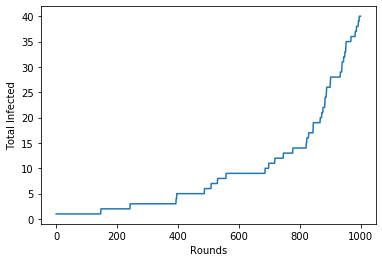

In [58]:
wear_off_rate = 1
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V, wear_off_rate )
results.append(question_B)
graphics(question_B)

<hr>  
Wear-Off-Rate = .9999 (minimal loss of effectivness)

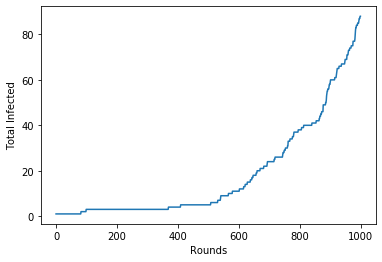

In [72]:
wear_off_rate = .9999
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V, wear_off_rate )
results.append(question_B)
graphics(question_B)

In [76]:
results.pop()
print(len(results))

4


<hr>  
Wear-Off-Rate = .999 (moderate loss of effectivness)

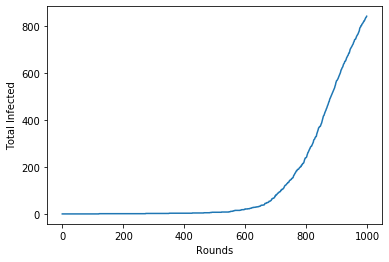

In [73]:
wear_off_rate = .999
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V, wear_off_rate )
results.append(question_B)
graphics(question_B)

<hr>  
Wear-Off-Rate = .99 (high loss of effectivness)

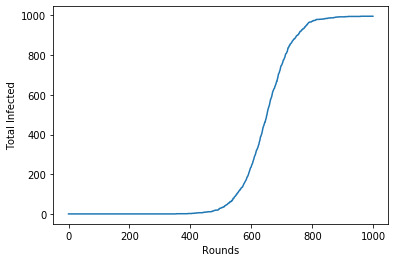

In [74]:
wear_off_rate = .99
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V, wear_off_rate )
results.append(question_B)
graphics(question_B)

<hr>
Wear-Off-Rate = 0 (immediate loss of effectivness)

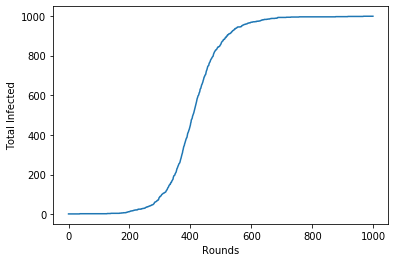

In [77]:
wear_off_rate = 0
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V, wear_off_rate )
results.append(question_B)
graphics(question_B)

#### Plotting result on one graph

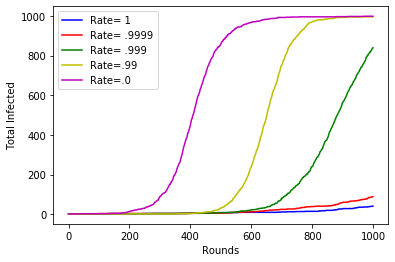

In [79]:
plt.plot(results[0], '-b', label='Rate= 1')
plt.plot(results[1], '-r', label='Rate= .9999')
plt.plot(results[2], '-g', label='Rate= .999')
plt.plot(results[3], '-y', label='Rate=.99')
plt.plot(results[4], '-m', label='Rate=.0')
plt.legend(loc='upper left', frameon=True)
plt.ylabel('Total Infected')
plt.xlabel('Rounds')
plt.show()